<a href="https://colab.research.google.com/github/alexcpn/neuralnetwork_learn/blob/main/explain_neuralnet_asifiama__schoolkid_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below is the neural net we want to model; Taking inputs x0 to x4 and giving an output 

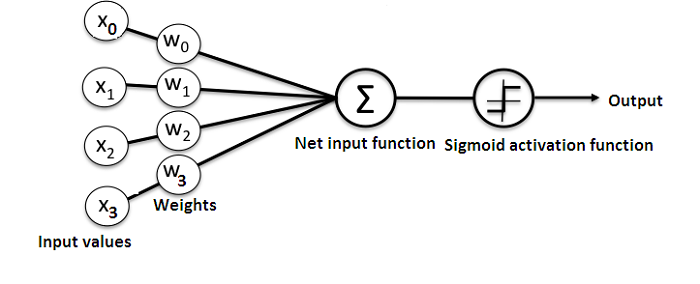![image.png]( )![](https://)

In [ ]:
# This x defines our Input; or in Neural Network terms, the training set

x = np.array(
    [
        [0,0,1],
        [0,1,1],
        [1,0,1],
        [1,1,1]
    ])


In [ ]:
# and let y be the desired ouput 
# Basically the first row in y represents the  exected ouput for the first row of the training set.
# That is the output becomes1 only when two of the inputs
# becomes one
y = np.array(
  [
      [0],
      [1],
      [1],
      [0]
  ])

Now we need to define the weights of the layers of our neural network.
Note that the input is of shape $4*3$. So the first layer should be of shape that we can take dot product of.
Let us use $3*4$. The shape of the dot product woud be $4*4$ and the next layer weight should be comptaible with it. Let's take the next layer weights as size $4*1$.

In [ ]:
np.random.seed(1)

# randomly initialize our weights with mean 0

weight1 = np.random.random((3,4)) 
weight2 = np.random.random((4,1)) 


In [3]:
#---------------------------------------------------------------
# Boiler plate code for calculating Sigmoid, derivative etc
#---------------------------------------------------------------

import numpy as np
# seed random numbers to make calculation deterministic 
np.random.seed(1)

# pretty print numpy array
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# let us code our sigmoid funciton
def sigmoid(x):
    return 1/(1+np.exp(-x))

# let us add a method that takes the derivative of x as well
def derv_sigmoid(x):
   return sigmoid(x)*(1-sigmoid(x))

#---------------------------------------------------------------

# Two layered NW. Using from (1) and the equations we derived as explanaionns
# (1) http://iamtrask.github.io/2015/07/12/basic-python-network/
#---------------------------------------------------------------

# set learning rate as 1 for this toy example
learningRate = 1

# input x, also used as the training set here
x = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])

# desired output for each of the training set above
y = np.array([[0,1,1,0]]).T

# Explanaiton - as long as input has two ones, but not three, ouput is One
"""
Input [0,0,1]  Output = 0
Input [0,1,1]  Output = 1
Input [1,0,1]  Output = 1
Input [1,1,1]  Output = 0
"""

# Randomly initalised weights
weight1 =  np.random.random((3,4)) 
weight2 =  np.random.random((4,1)) 

# Activation to layer 0 is taken as input x
a0 = x

iterations = 1000
for iter in range(0,iterations):

  # Forward pass - Straight Forward
  z1= np.dot(x,weight1)
  a1 = sigmoid(z1) 
  z2= np.dot(a1,weight2)
  a2 = sigmoid(z2) 
  if iter == 0:
    print("Intial Ouput \n",a2)

  # Backward Pass - Backpropagation 
  delta2  = (a2-y)
  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of 2nd/last layer
  # Eq (A) ---> dC_dw2 = delta2*derv_sigmoid(z2)*a1.T
  #---------------------------------------------------------------

  dC_dw2_1  = delta2*derv_sigmoid(z2) 
  dC_dw2  = a1.T.dot(dC_dw2_1)
  
  #---------------------------------------------------------------
  # Calcluating change of Cost/Loss wrto weight of 2nd/last layer
  # Eq (B)---> dC_dw1 = derv_sigmoid(z1)*delta2*derv_sigmoid(z2)*weight2*a0.T
  # dC_dw1 = derv_sigmoid(z1)*dC_dw2*weight2_1*a0.T
  #---------------------------------------------------------------

  dC_dw1 =  np.multiply(dC_dw2_1,weight2.T) * derv_sigmoid(z1)
  dC_dw1 = a0.T.dot(dC_dw1)

  #---------------------------------------------------------------
  #Gradinent descent
  #---------------------------------------------------------------
 
  weight2 = weight2 - learningRate*(dC_dw2)
  weight1 = weight1 - learningRate*(dC_dw1)


print("New ouput",a2)

#---------------------------------------------------------------
# Training is done, weight2 and weight2 are primed for output y
#---------------------------------------------------------------

# Lets test out, two ones in input and one zero, ouput should be One
x = np.array([[1,0,1]])
z1= np.dot(x,weight1)
a1 = sigmoid(z1) 
z2= np.dot(a1,weight2)
a2 = sigmoid(z2) 
print("Ouput after Training is \n",a2)
     


Intial Ouput 
 [[ 0.758]
 [ 0.771]
 [ 0.791]
 [ 0.801]]
New ouput [[ 0.028]
 [ 0.925]
 [ 0.925]
 [ 0.090]]
Ouput after Training is 
 [[ 0.925]]


# Same model via Tensorflow framework

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 4)                 16        
_________________________________________________________________
layer3 (Dense)               (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.00016890373080968857
Test accuracy: 1.0


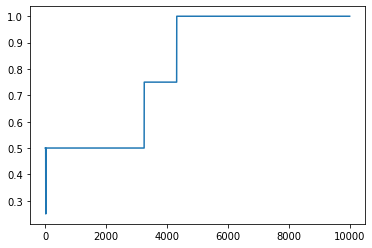

prediction [[0.01]
 [0.99]
 [0.98]
 [0.01]]


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot

np.random.seed(1337)

# Define Sequential model with 3 layers
# https://keras.io/api/layers/core_layers/dense/

model = keras.Sequential()
model.add(layers.Dense(3, activation="sigmoid", name="layer1",input_shape=(3,)))
model.output_shape
model.add(layers.Dense(4, activation="sigmoid", name="layer2"))
model.output_shape
model.add(layers.Dense(1, activation="sigmoid", name="layer3"))
model.output_shape
opt = tf.keras.optimizers.SGD(learning_rate=1.0)
model.compile(optimizer=opt, loss='mse',metrics=[['accuracy'], ['mse']])
# Call model on a test input
#x = tf.constant(
x = np.array(   
    [
        [0,0,1],
        [0,1,1],
        [1,0,1],
        [1,1,1]
    ])
#x =tf.convert_to_tensor(x, dtype=tf.float16)
y = np.array([[0,1,1,0]]).T
#y =tf.convert_to_tensor(y, dtype=tf.float16)
model.summary()
history =model.fit(x, y, epochs=10000, batch_size=4,verbose=0,shuffle=False)
score = model.evaluate(x, y, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

pyplot.plot(history.history['accuracy'])
pyplot.show()
pred = model.predict(x) 
print("prediction",pred)
del model